<a href="https://colab.research.google.com/github/nxzK1/TelecomX_p2_Challenge/blob/desarrollo%2FInforme/TelecomX_p2_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Importa librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

!pip3 install catboost

from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00



# 📘 Diccionario de Datos

| **Nombre**               | **Descripción**                                                        |
|--------------------------|------------------------------------------------------------------------|
| `customerID`              | Número de identificación único de cada cliente                         |
| `Churn`                   | Si el cliente dejó o no la empresa.                                    |
| `gender`                  | Género (masculino o femenino).                                         |
| `SeniorCitizen`           | Cliente tiene o no una edad igual o mayor a 65 años.                   |
| `Partner`                 | Si el cliente tiene o no una pareja.                                   |
| `Dependents`              | Si el cliente tiene o no dependientes.                                 |
| `tenure`                  | Meses de contrato del cliente.                                         |
| `PhoneService`            | Suscripción al servicio telefónico.                                    |
| `MultipleLines`           | Suscripción a más de una línea telefónica.                             |
| `InternetService`         | Suscripción a un proveedor de internet.                                |
| `OnlineSecurity`          | Suscripción adicional de seguridad en línea.                           |
| `OnlineBackup`            | Suscripción adicional de respaldo en línea.                            |
| `DeviceProtection`        | Suscripción adicional de protección del dispositivo.                   |
| `TechSupport`             | Suscripción adicional de soporte técnico, menor tiempo de espera.     |
| `StreamingTV`             | Suscripción de televisión por cable.                                   |
| `StreamingMovies`         | Suscripción de streaming de películas.                                 |
| `Contract`                | Tipo de contrato.                                                      |
| `PaperlessBilling`        | Si el cliente prefiere recibir la factura en línea.                    |
| `PaymentMethod`           | Forma de pago.                                                         |
| `Charges.Monthly`         | Total de todos los servicios del cliente por mes.                      |
| `Charges.Total`           | Total gastado por el cliente.                                          

# 💡 Deteccion preventiva de datos y normalización

In [3]:
url = 'https://raw.githubusercontent.com/nxzK1/TelecomX_p2_Challenge/refs/heads/Desarrollo/TelecomX_p1_tratados.csv'

df = pd.read_csv(url)
df.head(5)

,ID_Cliente,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
0,0002-ORFBO,0,femenino,0,1,1,9,1,no,dsl,...,no,si,si,no,un año,1,cheque fisico,65.6,593.30,2.19
1,0003-MKNFE,0,masculino,0,0,0,9,1,si,dsl,...,no,no,no,si,mes a mes,0,cheque fisico,59.9,542.40,2.00
2,0004-TLHLJ,1,masculino,0,0,0,4,1,no,fibra optica,...,si,no,no,no,mes a mes,1,cheque electronico,73.9,280.85,2.46
3,0011-IGKFF,1,masculino,1,1,0,13,1,no,fibra optica,...,si,no,si,si,mes a mes,1,cheque electronico,98.0,1237.85,3.27
4,0013-EXCHZ,1,femenino,1,1,0,3,1,no,fibra optica,...,no,si,si,no,mes a mes,1,cheque fisico,83.9,267.40,2.80


In [4]:
df.shape

(7256, 22)

In [5]:
df.columns

Index(['ID_Cliente', 'Cancelacion_servicios', 'Genero', 'Adulto_mayor',
       'Conyuge', 'Con_dependientes', 'Meses_contrato', 'Servicio_movil',
       'MultiLinea', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'Transmision_TV', 'Transmision_peliculas', 'Tipo_contrato',
       'Factura_electronica', 'Metodo_pago', 'Factura_mensual',
       'Facturacion_total', 'Cuentas_Diarias'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7256 non-null   object 
 1   Cancelacion_servicios   7256 non-null   int64  
 2   Genero                  7256 non-null   object 
 3   Adulto_mayor            7256 non-null   int64  
 4   Conyuge                 7256 non-null   int64  
 5   Con_dependientes        7256 non-null   int64  
 6   Meses_contrato          7256 non-null   int64  
 7   Servicio_movil          7256 non-null   int64  
 8   MultiLinea              7256 non-null   object 
 9   Servicio_Internet       7256 non-null   object 
 10  Seguridad_Online        7256 non-null   object 
 11  Respaldo_Online         7256 non-null   object 
 12  Proteccion_dispositivo  7256 non-null   object 
 13  Soporte_tecnico         7256 non-null   object 
 14  Transmision_TV          7256 non-null   

In [7]:
df.isna().sum()

,0
ID_Cliente,0
Cancelacion_servicios,0
Genero,0
Adulto_mayor,0
Conyuge,0
Con_dependientes,0
Meses_contrato,0
Servicio_movil,0
MultiLinea,0
Servicio_Internet,0


In [8]:
df.isnull().sum()

,0
ID_Cliente,0
Cancelacion_servicios,0
Genero,0
Adulto_mayor,0
Conyuge,0
Con_dependientes,0
Meses_contrato,0
Servicio_movil,0
MultiLinea,0
Servicio_Internet,0


In [9]:
df_modelos = df.copy()
df_modelos.drop(columns=['ID_Cliente'], inplace=True)

df_modelos.head(5)

,Cancelacion_servicios,Genero,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,MultiLinea,Servicio_Internet,Seguridad_Online,...,Proteccion_dispositivo,Soporte_tecnico,Transmision_TV,Transmision_peliculas,Tipo_contrato,Factura_electronica,Metodo_pago,Factura_mensual,Facturacion_total,Cuentas_Diarias
0,0,femenino,0,1,1,9,1,no,dsl,no,...,no,si,si,no,un año,1,cheque fisico,65.6,593.30,2.19
1,0,masculino,0,0,0,9,1,si,dsl,no,...,no,no,no,si,mes a mes,0,cheque fisico,59.9,542.40,2.00
2,1,masculino,0,0,0,4,1,no,fibra optica,no,...,si,no,no,no,mes a mes,1,cheque electronico,73.9,280.85,2.46
3,1,masculino,1,1,0,13,1,no,fibra optica,no,...,si,no,si,si,mes a mes,1,cheque electronico,98.0,1237.85,3.27
4,1,femenino,1,1,0,3,1,no,fibra optica,no,...,no,si,si,no,mes a mes,1,cheque fisico,83.9,267.40,2.80


In [10]:
df_modelos.columns

Index(['Cancelacion_servicios', 'Genero', 'Adulto_mayor', 'Conyuge',
       'Con_dependientes', 'Meses_contrato', 'Servicio_movil', 'MultiLinea',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'Transmision_TV',
       'Transmision_peliculas', 'Tipo_contrato', 'Factura_electronica',
       'Metodo_pago', 'Factura_mensual', 'Facturacion_total',
       'Cuentas_Diarias'],
      dtype='object')

In [11]:
columnas_internet = [
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_dispositivo',
    'Soporte_tecnico', 'Transmision_TV', 'Transmision_peliculas'
]

for columnas in columnas_internet:
    df_modelos[columnas] = df_modelos[columnas].replace('sin servicio internet', 'no')

In [12]:
df_modelos['Seguridad_Online'].value_counts()

,count
Seguridad_Online,
no,5182
si,2074


In [13]:
df_modelos['MultiLinea'].value_counts()

,count
MultiLinea,
no,3490
si,3061
sin servicio movil,705


In [14]:
df_modelos['MultiLinea'] = df_modelos['MultiLinea'].replace('sin servicio movil', 'no')

In [15]:
df_modelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancelacion_servicios   7256 non-null   int64  
 1   Genero                  7256 non-null   object 
 2   Adulto_mayor            7256 non-null   int64  
 3   Conyuge                 7256 non-null   int64  
 4   Con_dependientes        7256 non-null   int64  
 5   Meses_contrato          7256 non-null   int64  
 6   Servicio_movil          7256 non-null   int64  
 7   MultiLinea              7256 non-null   object 
 8   Servicio_Internet       7256 non-null   object 
 9   Seguridad_Online        7256 non-null   object 
 10  Respaldo_Online         7256 non-null   object 
 11  Proteccion_dispositivo  7256 non-null   object 
 12  Soporte_tecnico         7256 non-null   object 
 13  Transmision_TV          7256 non-null   object 
 14  Transmision_peliculas   7256 non-null   

In [16]:
columnas_categoricas = ['Genero', 'MultiLinea', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
                        'Proteccion_dispositivo', 'Soporte_tecnico', 'Transmision_TV', 'Transmision_peliculas',
                        'Tipo_contrato', 'Metodo_pago']

In [17]:
df_codificada = pd.get_dummies(df_modelos, columns=columnas_categoricas, drop_first=True)
df_codificada

,Cancelacion_servicios,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,Factura_electronica,Factura_mensual,Facturacion_total,Cuentas_Diarias,...,Respaldo_Online_si,Proteccion_dispositivo_si,Soporte_tecnico_si,Transmision_TV_si,Transmision_peliculas_si,Tipo_contrato_mes a mes,Tipo_contrato_un año,Metodo_pago_cheque fisico,Metodo_pago_tarjeta de credito,Metodo_pago_transferencia bancaria
0,0,0,1,1,9,1,1,65.60,593.30,2.19,...,True,False,True,True,False,False,True,True,False,False
1,0,0,0,0,9,1,0,59.90,542.40,2.00,...,False,False,False,False,True,True,False,True,False,False
2,1,0,0,0,4,1,1,73.90,280.85,2.46,...,False,True,False,False,False,True,False,False,False,False
3,1,1,1,0,13,1,1,98.00,1237.85,3.27,...,True,True,False,True,True,True,False,False,False,False
4,1,1,1,0,3,1,1,83.90,267.40,2.80,...,False,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,0,13,1,0,55.15,742.90,1.84,...,False,False,True,False,False,False,True,True,False,False
7252,1,0,1,0,22,1,1,85.10,1873.70,2.84,...,False,False,False,False,True,True,False,False,False,False
7253,0,0,0,0,2,1,1,50.30,92.75,1.68,...,True,False,False,False,False,True,False,True,False,False
7254,0,0,1,1,67,1,0,67.85,4627.65,2.26,...,False,True,True,False,True,False,False,True,False,False


In [18]:
df_codificada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancelacion_servicios               7256 non-null   int64  
 1   Adulto_mayor                        7256 non-null   int64  
 2   Conyuge                             7256 non-null   int64  
 3   Con_dependientes                    7256 non-null   int64  
 4   Meses_contrato                      7256 non-null   int64  
 5   Servicio_movil                      7256 non-null   int64  
 6   Factura_electronica                 7256 non-null   int64  
 7   Factura_mensual                     7256 non-null   float64
 8   Facturacion_total                   7256 non-null   float64
 9   Cuentas_Diarias                     7256 non-null   float64
 10  Genero_masculino                    7256 non-null   bool   
 11  MultiLinea_si                       7256 no

In [19]:
conteo = df_codificada['Cancelacion_servicios'].value_counts()
print(conteo)

proporciones = df_codificada['Cancelacion_servicios'].value_counts(normalize=True)
print( proporciones)

# EXISTE DESBALANCE MODERADO

Cancelacion_servicios
0    5387
1    1869
Name: count, dtype: int64
Cancelacion_servicios
0    0.74242
1    0.25758
Name: proportion, dtype: float64


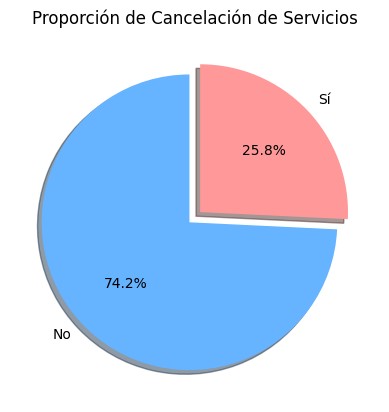

In [20]:
labels = df_codificada["Cancelacion_servicios"].replace({0: "No", 1: "Sí"}).value_counts()

labels.plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
    explode=(0.05, 0.05),
    shadow=True
)

plt.ylabel("")  # eliminar etiqueta innecesaria
plt.title("Proporción de Cancelación de Servicios")
plt.show()

/tmp/ipython-input-3292433962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_codificada, x="Cancelacion_servicios", y="Meses_contrato", palette="Set2")


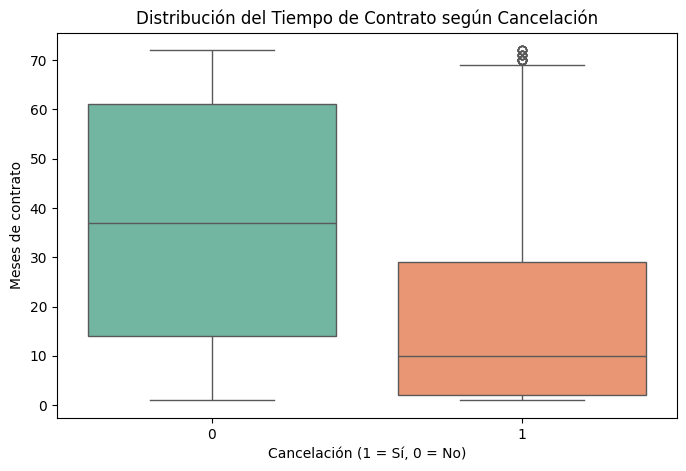

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_codificada, x="Cancelacion_servicios", y="Meses_contrato", palette="Set2")
plt.title("Distribución del Tiempo de Contrato según Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Meses de contrato")
plt.show()

/tmp/ipython-input-1023899802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_codificada, x="Cancelacion_servicios", y="Facturacion_total", palette="Set1")


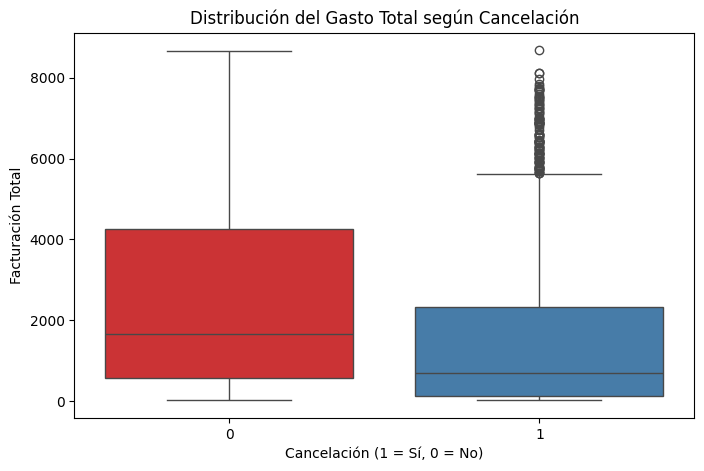

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_codificada, x="Cancelacion_servicios", y="Facturacion_total", palette="Set1")
plt.title("Distribución del Gasto Total según Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Facturación Total")
plt.show()

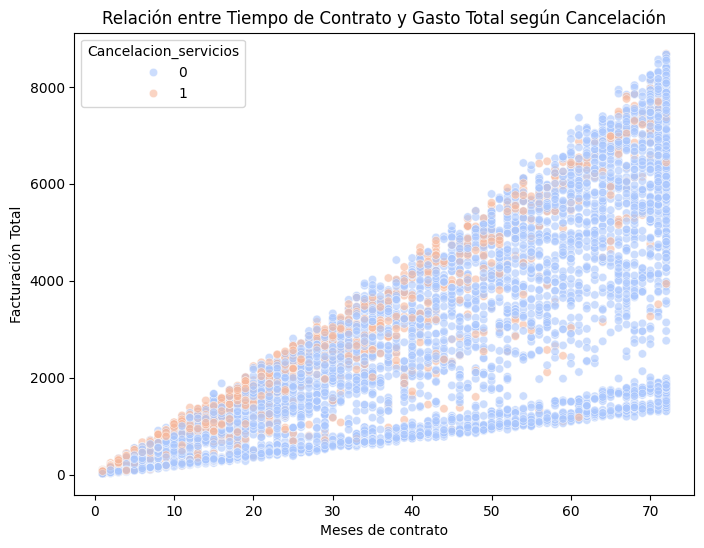

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_codificada, x="Meses_contrato", y="Facturacion_total",
                hue="Cancelacion_servicios", alpha=0.6, palette="coolwarm")
plt.title("Relación entre Tiempo de Contrato y Gasto Total según Cancelación")
plt.xlabel("Meses de contrato")
plt.ylabel("Facturación Total")
plt.show()


In [24]:
variables_numericas = df_codificada.select_dtypes(include=['int64', 'float64']).columns
variables_numericas

Index(['Cancelacion_servicios', 'Adulto_mayor', 'Conyuge', 'Con_dependientes',
       'Meses_contrato', 'Servicio_movil', 'Factura_electronica',
       'Factura_mensual', 'Facturacion_total', 'Cuentas_Diarias'],
      dtype='object')

In [25]:
scaler = MinMaxScaler()
df_codificada[variables_numericas] = scaler.fit_transform(df_codificada[variables_numericas])

df_codificada

,Cancelacion_servicios,Adulto_mayor,Conyuge,Con_dependientes,Meses_contrato,Servicio_movil,Factura_electronica,Factura_mensual,Facturacion_total,Cuentas_Diarias,...,Respaldo_Online_si,Proteccion_dispositivo_si,Soporte_tecnico_si,Transmision_TV_si,Transmision_peliculas_si,Tipo_contrato_mes a mes,Tipo_contrato_un año,Metodo_pago_cheque fisico,Metodo_pago_tarjeta de credito,Metodo_pago_transferencia bancaria
0,0.0,0.0,1.0,1.0,0.112676,1.0,1.0,0.471144,0.066294,0.471642,...,True,False,True,True,False,False,True,True,False,False
1,0.0,0.0,0.0,0.0,0.112676,1.0,0.0,0.414428,0.060420,0.414925,...,False,False,False,False,True,True,False,True,False,False
2,1.0,0.0,0.0,0.0,0.042254,1.0,1.0,0.553731,0.030239,0.552239,...,False,True,False,False,False,True,False,False,False,False
3,1.0,1.0,1.0,0.0,0.169014,1.0,1.0,0.793532,0.140670,0.794030,...,True,True,False,True,True,True,False,False,False,False
4,1.0,1.0,1.0,0.0,0.028169,1.0,1.0,0.653234,0.028687,0.653731,...,False,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,0.0,0.0,0.169014,1.0,0.0,0.367164,0.083556,0.367164,...,False,False,True,False,False,False,True,True,False,False
7252,1.0,0.0,1.0,0.0,0.295775,1.0,1.0,0.665174,0.214043,0.665672,...,False,False,False,False,True,True,False,False,False,False
7253,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.318905,0.008533,0.319403,...,True,False,False,False,False,True,False,True,False,False
7254,0.0,0.0,1.0,1.0,0.929577,1.0,0.0,0.493532,0.531831,0.492537,...,False,True,True,False,True,False,False,True,False,False


In [26]:
corr = df_codificada.corr()

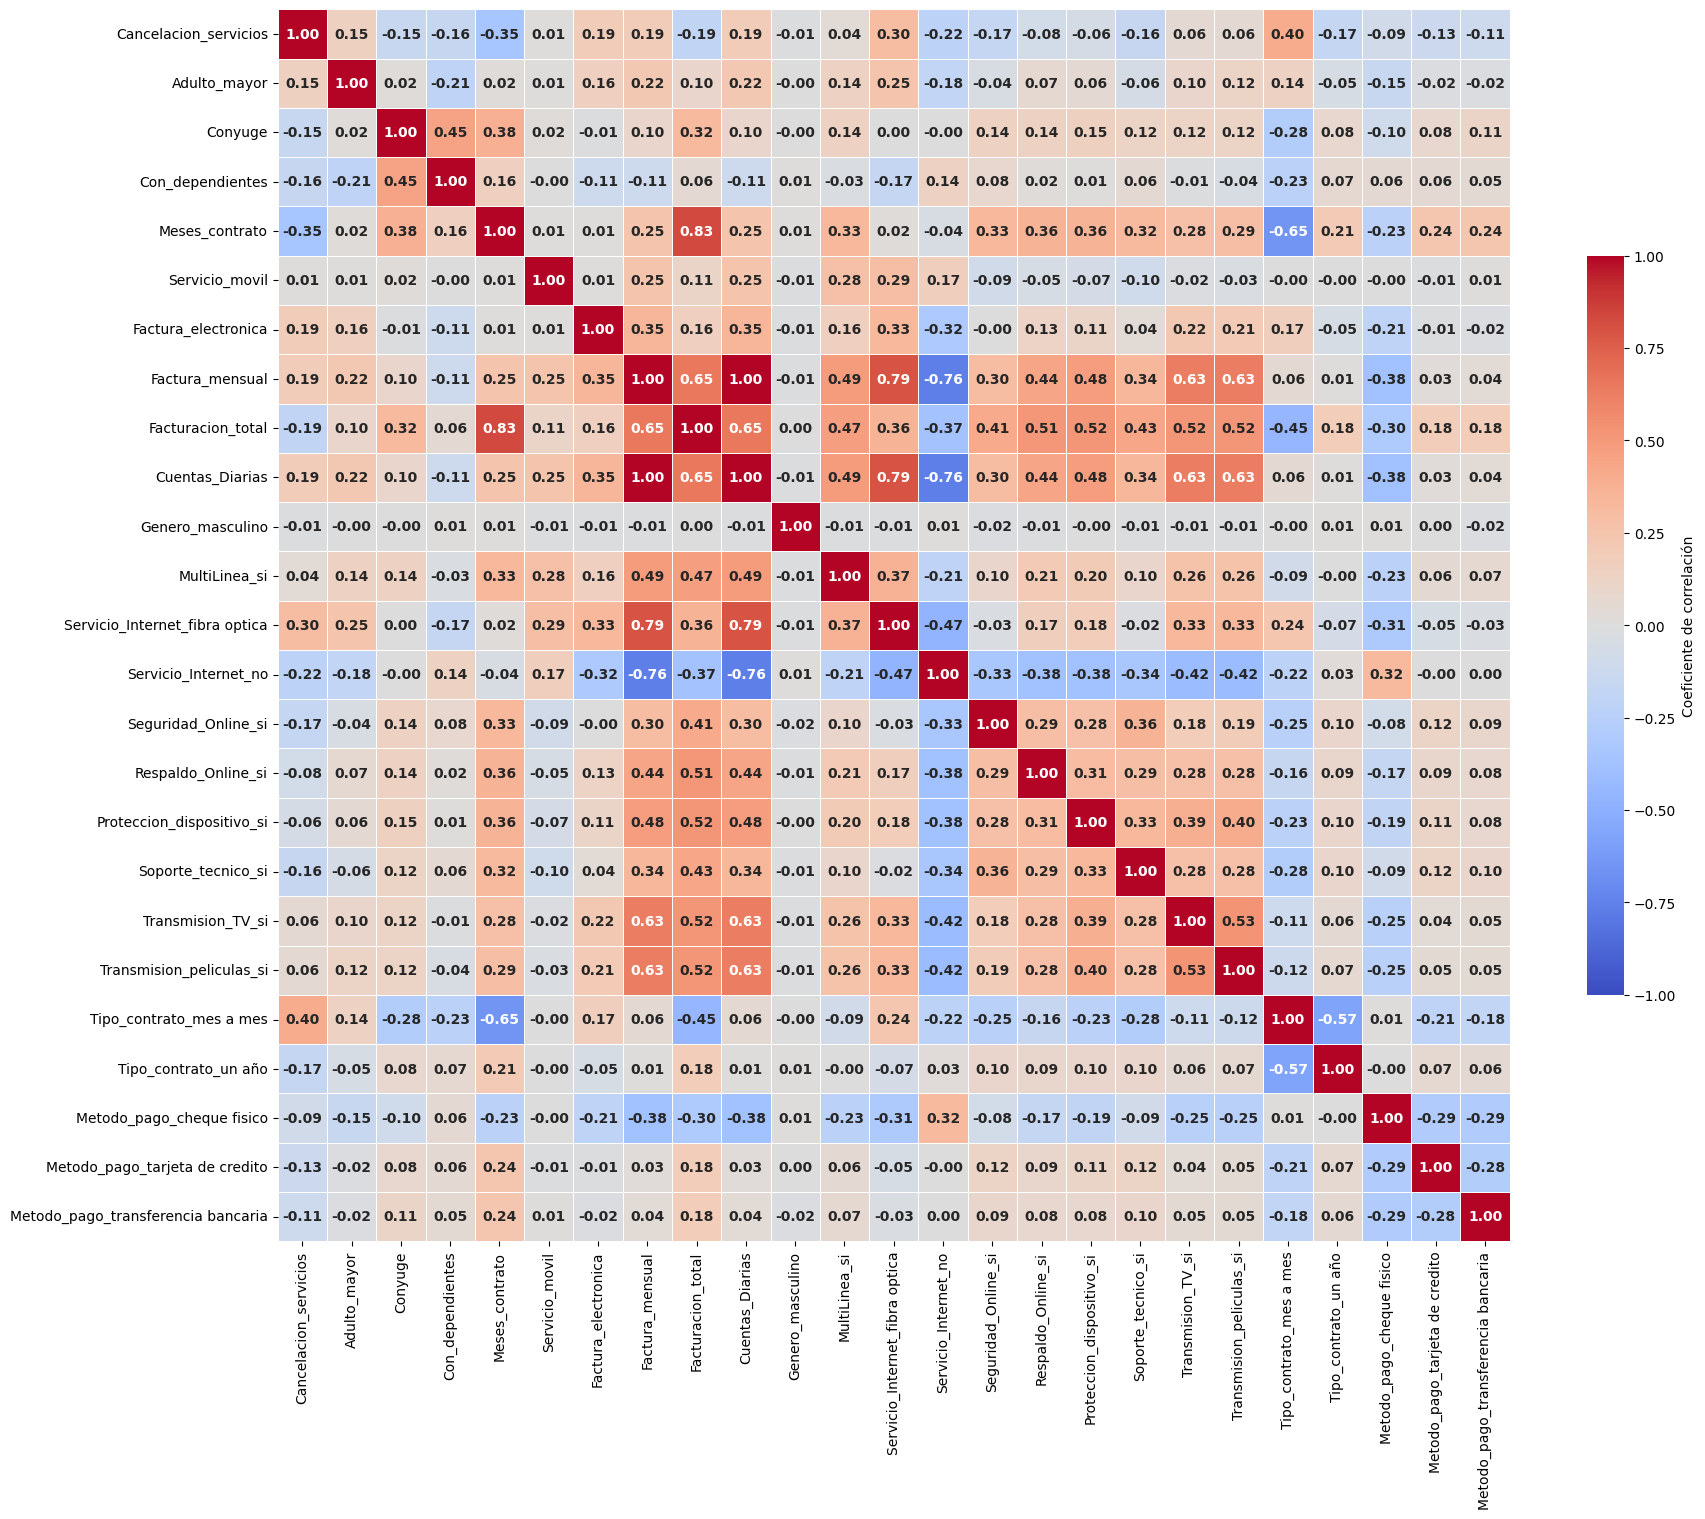

In [27]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0, cmap='coolwarm',
            square=True, linewidths=.5, annot=True, fmt='.2f',
            annot_kws={"size": 10, "weight": "bold"},
            cbar_kws={"shrink": 0.6, "label": "Coeficiente de correlación"})
plt.show()

# 🔎 Comparación de correlación

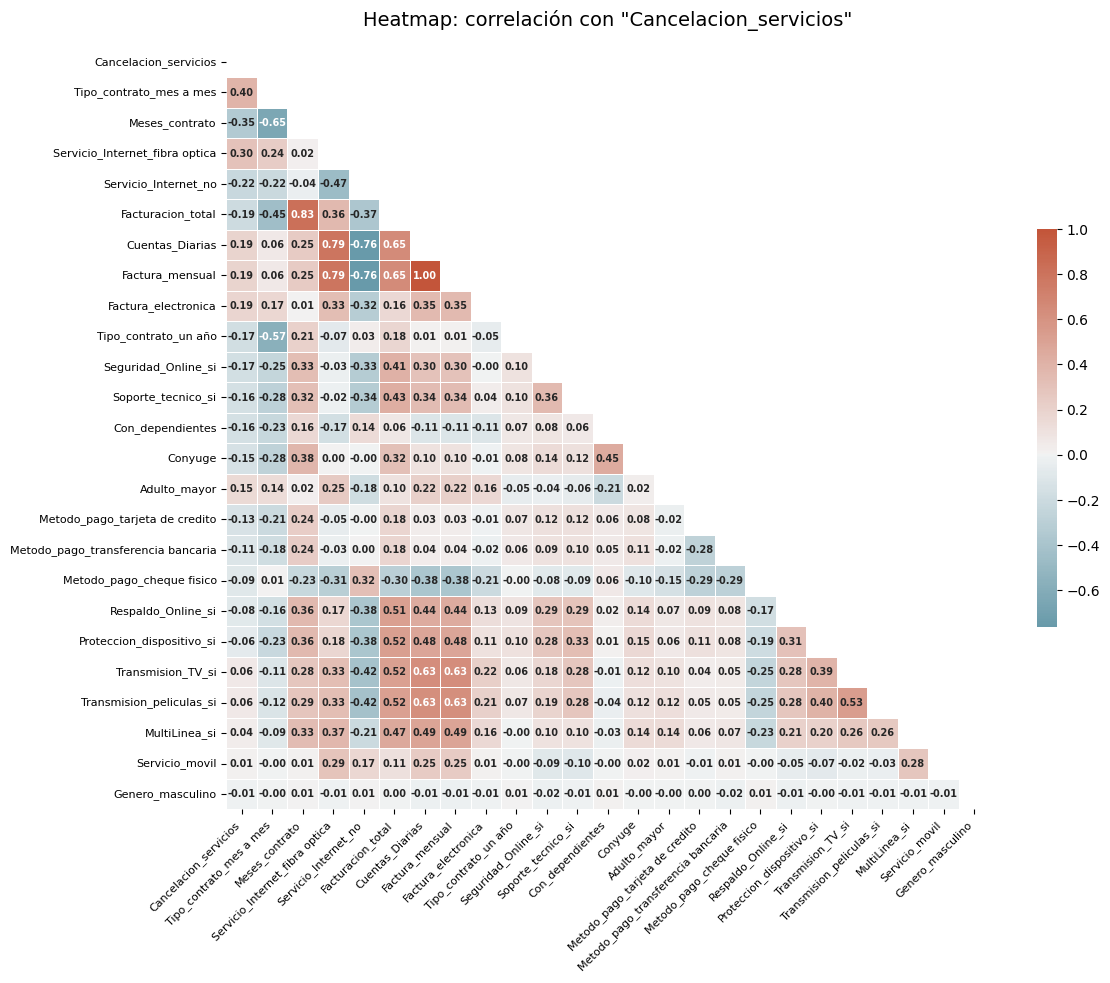

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap_correlacion_target(corr, variable_objetivo):

    variables_relevantes = corr.index.tolist()
    if variable_objetivo not in variables_relevantes:
        variables_relevantes.append(variable_objetivo)

    variables_relevantes = sorted(
        variables_relevantes,
        key=lambda x: abs(corr.loc[x, variable_objetivo]),
        reverse=True
    )

    filtro = corr.loc[variables_relevantes, variables_relevantes]

    mask = np.triu(np.ones_like(filtro, dtype=bool))

    min_corr = filtro.min().min()
    max_corr = filtro.max().max()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        filtro,
        annot=True,
        fmt=".2f",
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        mask=mask,
        annot_kws={"size": 7, "weight": "bold"},
        vmin=min_corr,
        vmax=max_corr
    )

    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.title(f'Heatmap: correlación con "{variable_objetivo}"', fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()


heatmap_correlacion_target(corr, variable_objetivo='Cancelacion_servicios')


Como observación podemos ver las variables mas fuertes, para bien y para mal, en relacion a la cancelación de servicios

Tipo_contrato_mes_a_mes (~0.40)

Clientes con contrato mensual tienden a cancelar mas por sobre los que tienen contratos mas largos

Meses_contrato (-0.35)

Relación negativa: clientes con más tiempo de contrato tienen la probabilidad de cancelar menos sus servicios.

In [29]:
X = df_codificada.drop(columns=['Cancelacion_servicios'])

In [30]:
X_const = add_constant(X)

In [31]:
vif_listada = []

X_const = X_const.astype(float)

for i in range(X_const.shape[1]):
    vif = variance_inflation_factor(X_const.values, i)
    vif_listada.append(vif)

vif_data = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": vif_listada
})

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
7,Factura_mensual,116543.052871
9,Cuentas_Diarias,116026.687345
12,Servicio_Internet_fibra optica,149.303770
13,Servicio_Internet_no,105.084499
0,const,87.468179
5,Servicio_movil,35.213057
19,Transmision_peliculas_si,24.252835
18,Transmision_TV_si,24.154070
8,Facturacion_total,10.834186
4,Meses_contrato,7.580663


In [32]:
X_filtro = X_const.copy()

col_a_eliminar = ['Factura_mensual', 'Cuentas_Diarias', 'Servicio_Internet_no']

X_filtro.drop(columns=col_a_eliminar, inplace=True)

X_filtro = X_filtro.astype(float)

vif_listada_2 = []

for i in range(X_filtro.shape[1]):
    vif = variance_inflation_factor(X_filtro.values, i)
    vif_listada_2.append(vif)

vif_data = pd.DataFrame({
    "feature": X_filtro.columns,
    "VIF": vif_listada_2
})

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,41.106913
7,Facturacion_total,10.569978
4,Meses_contrato,7.313702
17,Tipo_contrato_mes a mes,3.399367
10,Servicio_Internet_fibra optica,2.276135
16,Transmision_peliculas_si,1.730503
15,Transmision_TV_si,1.718250
18,Tipo_contrato_un año,1.692727
19,Metodo_pago_cheque fisico,1.669691
20,Metodo_pago_tarjeta de credito,1.526047


# ☑️ Selección de Variables

In [33]:
X = df_codificada.drop("Cancelacion_servicios", axis=1)
y = df_codificada["Cancelacion_servicios"]

# 🤔 Entrenamiento, escalado y balance de variables

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=55, stratify=y)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
smote = SMOTE(random_state=55)
X_train_balanceada, y_train_balanceada = smote.fit_resample(X_train_scaled, y_train)

# 🔎 Modelos

In [37]:
modelo_svm = SVC(probability=True, random_state=55)
modelo_svm.fit(X_train_balanceada, y_train_balanceada)

y_pred_svm = modelo_svm.predict(X_test_scaled)
y_prob_svm = modelo_svm.predict_proba(X_test_scaled)[:, 1]

print('Modelo SVM: ')
print('Exactitud:', accuracy_score(y_test, y_pred_svm))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_svm))
print('ROC AUC:', roc_auc_score(y_test, y_prob_svm))
print('F1:', f1_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Modelo SVM: 
Exactitud: 0.7606798346348186
Matriz de Confusión: [[1261  355]
 [ 166  395]]
ROC AUC: 0.8159790243730256
F1: 0.6025934401220442
Recall: 0.7040998217468806
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1616
         1.0       0.53      0.70      0.60       561

    accuracy                           0.76      2177
   macro avg       0.71      0.74      0.72      2177
weighted avg       0.79      0.76      0.77      2177



In [38]:
modelo_lr = LogisticRegression(random_state=55)
modelo_lr.fit(X_train_balanceada, y_train_balanceada)

y_pred_lr = modelo_lr.predict(X_test_scaled)
y_prob_lr = modelo_lr.predict_proba(X_test_scaled)[:, 1]

print('Modelo regresion logistica')
print('Exactitud:', accuracy_score(y_test, y_pred_lr))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_prob_lr))
print('F1:', f1_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Modelo regresion logistica
Exactitud: 0.7340376665135507
Matriz de Confusión: [[1151  465]
 [ 114  447]]
ROC AUC: 0.840093384338434
F1: 0.6069246435845214
Recall: 0.7967914438502673
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1616
         1.0       0.49      0.80      0.61       561

    accuracy                           0.73      2177
   macro avg       0.70      0.75      0.70      2177
weighted avg       0.80      0.73      0.75      2177



In [39]:
modelo_xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=55)

modelo_xgboost.fit(X_train_balanceada, y_train_balanceada)
y_pred_xgb = modelo_xgboost.predict(X_test_scaled)
y_prob_xgb = modelo_xgboost.predict_proba(X_test_scaled)[:, 1]

print('Modelo XGBoost:')
print('Exactitud:', accuracy_score(y_test, y_pred_xgb))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, y_prob_xgb))
print('F1:', f1_score(y_test, y_pred_xgb))
print('Recall:', recall_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:49:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo XGBoost:
Exactitud: 0.7781350482315113
Matriz de Confusión: [[1375  241]
 [ 242  319]]
ROC AUC: 0.8166336854273663
F1: 0.5691347011596789
Recall: 0.5686274509803921
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1616
         1.0       0.57      0.57      0.57       561

    accuracy                           0.78      2177
   macro avg       0.71      0.71      0.71      2177
weighted avg       0.78      0.78      0.78      2177



In [40]:
modelo_catBoost = CatBoostClassifier(verbose=0, random_state=55)
modelo_catBoost.fit(X_train_balanceada, y_train_balanceada)

y_pred_cb = modelo_catBoost.predict(X_test_scaled)
y_prob_cb = modelo_catBoost.predict_proba(X_test_scaled)[:, 1]

print('Modelo CatBoost:')
print('Exactitud:', accuracy_score(y_test, y_pred_cb))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_cb))
print('ROC AUC:', roc_auc_score(y_test, y_prob_cb))
print('F1:', f1_score(y_test, y_pred_cb))
print('Recall:', recall_score(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))

Modelo CatBoost:
Exactitud: 0.7831878732200276
Matriz de Confusión: [[1381  235]
 [ 237  324]]
ROC AUC: 0.8338219851396906
F1: 0.5785714285714286
Recall: 0.5775401069518716
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1616
         1.0       0.58      0.58      0.58       561

    accuracy                           0.78      2177
   macro avg       0.72      0.72      0.72      2177
weighted avg       0.78      0.78      0.78      2177



In [41]:
modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train_balanceada, y_train_balanceada)

y_pred_nb = modelo_naive_bayes.predict(X_test_scaled)
y_prob_nb = modelo_naive_bayes.predict_proba(X_test_scaled)[:, 1]

print('Modelo Naive Bayes:')
print('Exactitud:', accuracy_score(y_test, y_pred_nb))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_nb))
print('ROC AUC:', roc_auc_score(y_test, y_prob_nb))
print('F1:', f1_score(y_test, y_pred_nb))
print('Recall:', recall_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Modelo Naive Bayes:
Exactitud: 0.7423059255856683
Matriz de Confusión: [[1178  438]
 [ 123  438]]
ROC AUC: 0.8244234349905579
F1: 0.6096033402922756
Recall: 0.7807486631016043
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1616
         1.0       0.50      0.78      0.61       561

    accuracy                           0.74      2177
   macro avg       0.70      0.75      0.71      2177
weighted avg       0.80      0.74      0.76      2177



In [42]:
modelo_rf= RandomForestClassifier(random_state=55)
modelo_rf.fit(X_train_balanceada, y_train_balanceada)

y_pred_rf = modelo_rf.predict(X_test_scaled)
y_prob_rf = modelo_rf.predict_proba(X_test_scaled)[:, 1]

print('Modelo Random Forest:')
print('Exactitud:', accuracy_score(y_test, y_pred_rf))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_prob_rf))
print('F1:', f1_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Modelo Random Forest:
Exactitud: 0.7827285254937988
Matriz de Confusión: [[1378  238]
 [ 235  326]]
ROC AUC: 0.8231190766135436
F1: 0.5795555555555556
Recall: 0.5811051693404634
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1616
         1.0       0.58      0.58      0.58       561

    accuracy                           0.78      2177
   macro avg       0.72      0.72      0.72      2177
weighted avg       0.78      0.78      0.78      2177



In [43]:
modelo_lightGBM = lgb.LGBMClassifier(random_state=55)

modelo_lightGBM.fit(X_train_balanceada, y_train_balanceada)

y_pred_lgbm = modelo_lightGBM.predict(X_test_scaled)
y_prob_lgbm = modelo_lightGBM.predict_proba(X_test_scaled)[:, 1]

print('Modelo LightGBM:')
print('Exactitud:', accuracy_score(y_test, y_pred_lgbm))
print('Matriz de Confusión:', confusion_matrix(y_test, y_pred_lgbm))
print('ROC AUC:', roc_auc_score(y_test, y_prob_lgbm))
print('F1:', f1_score(y_test, y_pred_lgbm))
print('Recall:', recall_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 3771, number of negative: 3771
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2496
[LightGBM] [Info] Number of data points in the train set: 7542, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Modelo LightGBM:
Exactitud: 0.7841065686724851
Matriz de Confusión: [[1376  240]
 [ 230  331]]
ROC AUC: 0.8282868728049275
F1: 0.5848056537102474
Recall: 0.5900178253119429
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1616
         1.0       0.58      0.59      0.58       561

    accuracy                           0.78      2177
   macro avg       0.72      0.72      0.72      2177
weighted avg       0.79      0.78      0.78      2177



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [44]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_balanceada, y_train_balanceada)


y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("Modelo KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Modelo KNN:
Accuracy: 0.6830500689021589
ROC AUC: 0.7467724713647835
F1 Score: 0.5369127516778524
Recall: 0.7130124777183601
[[1087  529]
 [ 161  400]]
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76      1616
         1.0       0.43      0.71      0.54       561

    accuracy                           0.68      2177
   macro avg       0.65      0.69      0.65      2177
weighted avg       0.76      0.68      0.70      2177



# 📄 INFORME FINAL

Comparación de cada modelo:

| Modelo                  | Exactitud | ROC AUC   | F1        | Recall    |
| ----------------------- | --------- | --------- | --------- | --------- |
| **Logistic Regression** | 0.734     | **0.840** | 0.607     | **0.797** |
| **Naive Bayes**         | 0.742     | 0.824     | **0.610** | 0.781     |
| **SVM**                 | 0.761     | 0.816     | 0.603     | 0.704     |
| **Random Forest**       | 0.783     | 0.823     | 0.580     | 0.581     |
| **XGBoost**             | 0.778     | 0.817     | 0.569     | 0.569     |
| **CatBoost**            | 0.783     | 0.834     | 0.579     | 0.578     |
| **LightGBM**            | **0.784** | 0.828     | 0.585     | 0.590     |
| **KNN**                 | –         | 0.747     | 0.537     | 0.713     |


Aquellos que presentan un mejor desempeño son;

- LightGBM y CatBoost - Cuentan con una exactitud de (+0.78) y ROC AUC (>0.82), numeros que estan por sobre los demas modelos.

- Regresión logistica y Naive Bayes - Destacan por su puntaje en Recall mas alto que el resto (>0.78).

## Analisis Overfitting - Underfitting

- XGBoost, CatBoost, LightGBM, Random Forest; Buena exactitud pero menor Recall.

- Regresión Logistica y Naive Bayes; Generalizan mejor gracias a su puntaje en Recall, a costas de exactitud, esto puede indicar underfitting por parte de estos modelos.

## Analisis de variables e importancia en los modelos;

- Tipo de contrato (mensual o anual) → Los clientes con contrato mensual experimentan una mayor tasa de abandono.

- Antigüedad del cliente (cliente a largo plazo) → Los nuevos clientes tienen mayor probabilidad de cancelar su contrato.

- Método de pago (especialmente pago electronico o con tarjeta) → Se asocia con una mayor tasa de abandono.

Servicios adicionales:

- La falta de seguridad en linea o soporte técnico aumenta la tasa de abandono.

- Los clientes con un servicio de streaming activo tienden a permanecer más tiempo.

- Facturacion electronica → Se correlaciona con una mayor tasa de abandono.

- Facturacion mensual → Los clientes con comisiones elevadas tienden a cancelar su contrato con mayor frecuencia.

## Conclusion de modelos:

- **Regresión logistica y Naive Bayes presentan un mejor puntaje en Recall, lo que significa que detecta mas clientes que cancelan basados en las variables del DataFrame.**

Análisis de Variables por Modelo

## **Regresión Logística** (Modelo mas optimo para el caso):

- Coeficiente positivo - aumenta la probabilidad de Cancelacion de servicios.

- Coeficiente negativo - disminuye la probabilidad de Cancelación de servicios.

## Variables relevantes:

- Contrato (Mensual): mayor peso positivo - clientes con contrato mensual son mucho mas propensos a cancelar.

- Meses de contrato: coeficiente negativo - clientes con mas tiempo de contrato tienen menor probabilidad de cancelar.

- Metodo de pago (Cheque electronico): fuerte impacto positivo - los clientes que pagan con cheque electronico cancelan más.

- Facturación electronica: coeficiente positivo - los clientes con facturación electronica presentan mayor cancelación de servicios.

- Seguridad Online y Soporte tecnico: coeficientes negativos - contar con estos servicios reduce la probabilidad de cancelacion.

## Finalmente, algunas medidas para fidelizar a los clientes y disminuir su evación del servicio;

- Incentivos para contratos a largo plazo.

- Descuentos o ventajas adicionales para clientes con contratos anuales.

- Programas de fidelización para contratos de mas de un año.

- Mejora la experiencia del cliente desde los primeros meses (antigüedad reducida).

- Ofrecer acompañamiento proactivo y ventajas especiales durante los primeros seis meses.

- Encuestas de satisfaccion tempranas para detectar el riesgo de baja.

- Personalizacion por forma de pago

- Incentivos para las transferencias bancarias (menos bajas que con los pagos electronicos).

- Servicios complementarios como diferenciador

- Paquetes con asistencia tecnica 24 horas al dia, 7 dias a la semana, y seguridad en linea incluidos en los paquetes básicos.

- Ofrecer ofertas de streaming gratuitas durante un tiempo limitado.

- Ofrezca paquetes flexibles para reducir la sensacion de alto costo.

- Realizar ventas cruzadas con servicios mas economicos para fidelizar a sus clientes.